In [1]:
# tsfresh install
# import sys
# !{sys.executable} -m pip install tsfresh

In [ ]:
pip list

In [3]:
# import os
# os.kill(os.getpid(), 9)

## 데이터 불러오기

In [4]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
download_robot_execution_failures()

In [5]:
timeseries, y = load_robot_execution_failures()

In [6]:
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [7]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

## 데이터 가공하기

In [8]:
# feature extraction
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:33<00:00,  1.66s/it]


id별로 여러 특징(평균, 표준편차, 최대값, 최소값.. )들을 추출해서 새로운 형태로 만들어준다.

In [9]:
extracted_features

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,NaN,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,NaN,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,NaN,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,NaN,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,2.253858,2.397895,2.302585,2.197225,NaN,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.589027,1.893788,2.163956,2.197225,NaN,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,NaN,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,NaN,40.285714


In [10]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

# 결측치 처리 함수 impute
impute(extracted_features)

# y를 예측하는데 통계적으로 유의미한 feature만 선택
features_filtered = select_features(extracted_features, y)

C:\Users\juwonhee\Anaconda3\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [11]:
features_filtered

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__root_mean_square,F_y__abs_energy,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__standard_deviation,...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0"
1,14.0,14.0,0.966092,1.0,1.000000,15.0,0.930949,13.0,1.000000,0.471405,...,0.000000,0.0,-3.0,1.0,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000
2,7.0,25.0,1.290994,5.0,1.571429,13.0,2.250926,76.0,3.000000,2.054805,...,0.000000,1.0,-9.2,1.0,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000
3,11.0,12.0,0.894427,5.0,1.000000,14.0,1.632993,40.0,2.142857,1.768867,...,0.000000,3.0,-6.6,0.0,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000
4,5.0,16.0,1.032796,6.0,1.285714,10.0,2.000000,60.0,2.428571,2.669998,...,0.000000,0.0,-9.0,0.0,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000
5,9.0,17.0,1.064581,5.0,1.285714,13.0,1.751190,46.0,2.285714,2.039608,...,0.000000,0.0,-9.6,0.0,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,53.404120,42780.0,71.428571,39.541483,...,64.000000,46.0,203.2,0.0,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,10.076375,1523.0,12.142857,3.841296,...,4.666667,4.5,-41.6,0.0,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,37.473546,21064.0,47.714286,52.807154,...,0.250000,7.0,-84.8,0.0,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,143.447551,308658.0,157.285714,80.098162,...,0.000000,90.5,-139.2,0.0,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000


In [12]:
# robot_execution_failures 데이터셋 다운로드 및 불러오기
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [13]:
# 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## 데이터 셋 나누기

In [14]:
# 데이터셋 가공
# 클래스 비율을 고려하여 훈련과 테스트 셋으로 나누는 함수
def custom_classification_split(x, y, test_size=0.3):
    num_true = int(y.sum()*test_size)           # int(21 * 0.3) = 6 -> 테스트셋에 들어갈 true 샘플 수 6개
    num_false = int((len(y)-y.sum())*test_size) # int((88 - 21)*0.3) = 20 -> False는 67, 그중 테스트셋에 20개 사용

    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    # y==False인것과 y==True인것의 인덱스값을 리스트로 변환하여 더기기
    # y[y==False].head(num_false).index.to_list()는 19~38까지의 값이 리스트로
    # y[y==True].head(num_true).index.to_list()는 1~6까지의 값이 리스트로
    # id_list는 19~38 + 1~6이 더해진 리스트
    # id_list안에는 0과 1이 아닌, 인덱스 값이 넣어짐

    y_train = y.drop(id_list) # y에서 id_list를 제외한 데이터들
    y_test = y.iloc[id_list].sort_index() # id_list 정렬
    X_train = x[~x['id'].isin(id_list)] # id_list 안에 '없는' 인덱스에 대해서만 X_train에 넣어짐
    X_test = x[x['id'].isin(id_list)]   # id_list 안에 있는 인덱스에 대해서 동일한 id를 가진 샘플을 골라 X_test에 넣어짐

    return X_train, y_train, X_test, y_test

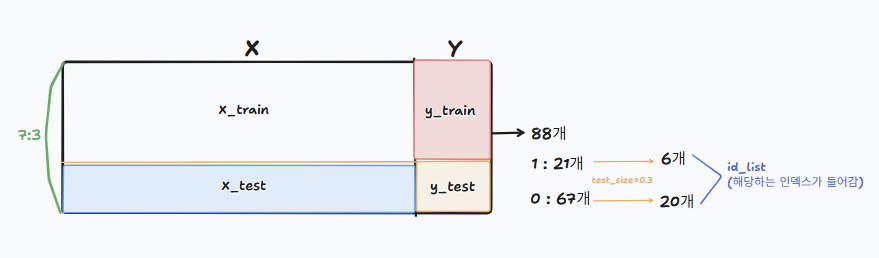

id_list의 인덱스와 동일한 id에 대해서 y_test, X_test가 만들어지고,  
그 외 인덱스에 대한 id로 X_train, y_train이 만들어진다.

### 계층적 샘플링(stratified sampling)
테스트셋을 나눌 때 전체 데이터에서 test_size만큼 떼어내는데  
1과 0의 비율을 원래 데이터 비율에 맞게 유지해서 샘플링
- 클래스 불균형 문제를 막는다.
- 테스트셋이 실제 분포를 잘 반영하도록 도와준다.

In [15]:
# 커스텀한 함수를 적용한 데이터셋이 어떤 차이가 있는지 확인해봅시다.
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y)
print(X_train)
print('-'*50)
print(y_train)
print('-'*50)
print(X_test)
print('-'*50)
print(y_test)

      id  time  F_x  F_y  F_z  T_x  T_y  T_z
90     7     0   -3    1   53  -10   -4    0
91     7     1    0   -2   65   -4   -1    0
92     7     2   -1   -1   56   -7   -3    0
93     7     3    0   -2   60   -6    0    0
94     7     4   -1   -1   57   -7   -4    0
...   ..   ...  ...  ...  ...  ...  ...  ...
1315  88    10  -10    2   39  -21  -24    5
1316  88    11  -11    2   38  -24  -22    6
1317  88    12  -12    3   23  -24  -24    5
1318  88    13  -13    4   26  -29  -27    5
1319  88    14  -13    2   15  -25  -25    6

[930 rows x 8 columns]
--------------------------------------------------
7      True
8      True
9      True
10     True
11     True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 62, dtype: bool
--------------------------------------------------
     id  time  F_x  F_y  F_z  T_x  T_y  T_z
0     1     0   -1   -1   63   -3   -1    0
1     1     1    0    0   62   -3   -1    0
2     1     2   -1   -1   61   -3    0    0
3 

## 피처 추출하기

In [16]:
# 특징 추출
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters

settings = MinimalFCParameters() # 최소한의 특징 추출 함수 
minimal_features_train = extract_features( # extract_features() X_train, X_test에서 여러 통계적 특징을 고려해 자동으로 추출
                                X_train,
                                column_id="id",
                                column_sort="time",
                                default_fc_parameters=settings # minimal 적용
                           )

minimal_features_test = extract_features(
                                X_test,
                                column_id="id",
                                column_sort="time",
                                default_fc_parameters=settings # minimal 적용
                           )

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.74it/s]


In [17]:
# 추출된 특징 확인
minimal_features_train

,F_x__sum_values,F_x__median,F_x__mean,F_x__length,F_x__standard_deviation,F_x__variance,F_x__root_mean_square,F_x__maximum,F_x__absolute_maximum,F_x__minimum,...,T_z__sum_values,T_z__median,T_z__mean,T_z__length,T_z__standard_deviation,T_z__variance,T_z__root_mean_square,T_z__maximum,T_z__absolute_maximum,T_z__minimum
7,-13.0,-1.0,-0.866667,15.0,0.805536,0.648889,1.183216,0.0,3.0,-3.0,...,-1.0,0.0,-0.066667,15.0,0.442217,0.195556,0.447214,1.0,1.0,-1.0
8,-10.0,-1.0,-0.666667,15.0,1.135292,1.288889,1.316561,2.0,2.0,-2.0,...,0.0,0.0,0.000000,15.0,1.032796,1.066667,1.032796,3.0,3.0,-1.0
9,-10.0,-1.0,-0.666667,15.0,1.074968,1.155556,1.264911,2.0,3.0,-3.0,...,3.0,0.0,0.200000,15.0,1.045626,1.093333,1.064581,3.0,3.0,-1.0
10,-14.0,-1.0,-0.933333,15.0,0.249444,0.062222,0.966092,0.0,1.0,-1.0,...,0.0,0.0,0.000000,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
11,-13.0,-1.0,-0.866667,15.0,0.956847,0.915556,1.290994,1.0,3.0,-3.0,...,-3.0,0.0,-0.200000,15.0,0.400000,0.160000,0.447214,0.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-1073.0,-98.0,-71.533333,15.0,36.585729,1338.515556,80.346334,-25.0,110.0,-110.0,...,-232.0,-21.0,-15.466667,15.0,9.659998,93.315556,18.235497,0.0,28.0,-28.0
85,143.0,8.0,9.533333,15.0,4.616877,21.315556,10.592450,19.0,19.0,4.0,...,-52.0,-2.0,-3.466667,15.0,2.156128,4.648889,4.082483,0.0,7.0,-7.0
86,961.0,52.0,64.066667,15.0,38.235179,1461.928889,74.608757,148.0,148.0,21.0,...,-81.0,-8.0,-5.400000,15.0,5.462600,29.840000,7.681146,8.0,10.0,-10.0
87,4509.0,338.0,300.600000,15.0,57.753268,3335.440000,306.097697,342.0,342.0,171.0,...,475.0,35.0,31.666667,15.0,9.903983,98.088889,33.179311,44.0,44.0,13.0


In [18]:
minimal_features_train.columns

Index(['F_x__sum_values', 'F_x__median', 'F_x__mean', 'F_x__length',
       'F_x__standard_deviation', 'F_x__variance', 'F_x__root_mean_square',
       'F_x__maximum', 'F_x__absolute_maximum', 'F_x__minimum',
       'F_y__sum_values', 'F_y__median', 'F_y__mean', 'F_y__length',
       'F_y__standard_deviation', 'F_y__variance', 'F_y__root_mean_square',
       'F_y__maximum', 'F_y__absolute_maximum', 'F_y__minimum',
       'F_z__sum_values', 'F_z__median', 'F_z__mean', 'F_z__length',
       'F_z__standard_deviation', 'F_z__variance', 'F_z__root_mean_square',
       'F_z__maximum', 'F_z__absolute_maximum', 'F_z__minimum',
       'T_x__sum_values', 'T_x__median', 'T_x__mean', 'T_x__length',
       'T_x__standard_deviation', 'T_x__variance', 'T_x__root_mean_square',
       'T_x__maximum', 'T_x__absolute_maximum', 'T_x__minimum',
       'T_y__sum_values', 'T_y__median', 'T_y__mean', 'T_y__length',
       'T_y__standard_deviation', 'T_y__variance', 'T_y__root_mean_square',
       'T_y__maximu

## 시각화

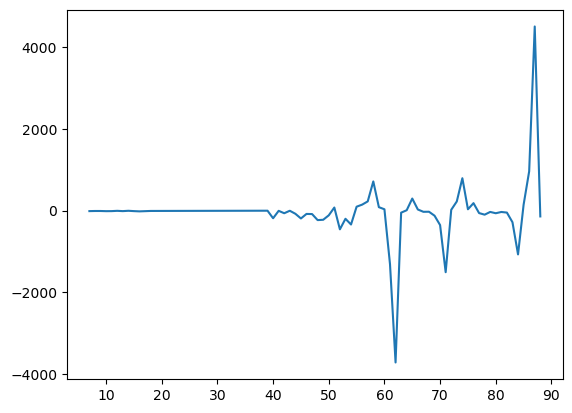

In [19]:
# 추출된 특징 시각화하기
plt.plot(minimal_features_train['F_x__sum_values'])
plt.show()

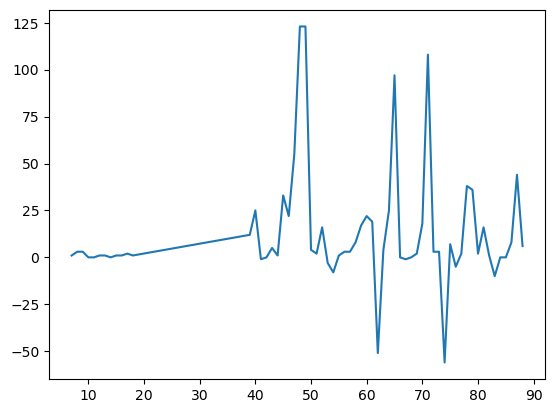

In [20]:
plt.plot(minimal_features_train['T_z__maximum'])
plt.show()

### LogisticRegression
이진 분류에 가장 기초가 되는 모델

In [21]:
# Logistic Regression 사용하기
logistic = LogisticRegression()
logistic.fit(minimal_features_train, y_train)

LogisticRegression()

In [22]:
# Logistic Regression score 확인하기
logistic.score(minimal_features_test, y_test)

0.8461538461538461

In [23]:
# 분류 성능 평가 지표 확인하기
# y는 True, False는 Target으로도 표현
classification_report(y_test, logistic.predict(minimal_features_test), target_names=['true', 'false'], output_dict=True) # y_test 내부에 있는 true, false와 일치하는 이름을 표시합니다.

{'true': {'precision': 1.0,
  'recall': 0.8,
  'f1-score': 0.8888888888888888,
  'support': 20.0},
 'false': {'precision': 0.6, 'recall': 1.0, 'f1-score': 0.75, 'support': 6.0},
 'accuracy': 0.8461538461538461,
 'macro avg': {'precision': 0.8,
  'recall': 0.9,
  'f1-score': 0.8194444444444444,
  'support': 26.0},
 'weighted avg': {'precision': 0.9076923076923078,
  'recall': 0.8461538461538461,
  'f1-score': 0.8568376068376069,
  'support': 26.0}}

true 예측은 1.0으로 높은 정확도를 보이지만  
false 예측은 0.4로 좋은 모델로 보기 어렵다.

# 미니 프로젝트

In [24]:
# 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 데이터 불러오기

In [25]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
ap = pd.read_csv(url)
print(ap.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [26]:
# Month컬럼 제거
ap = ap.drop('Month', axis=1)

In [27]:
ap

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


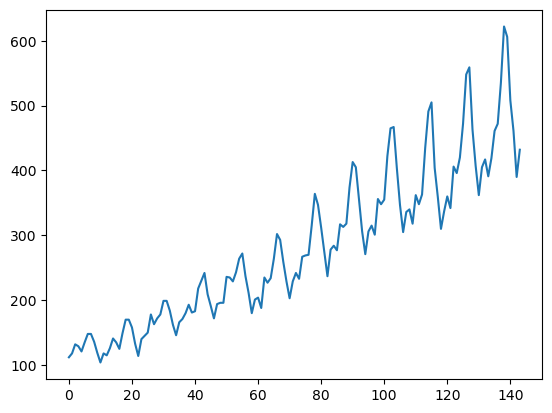

In [28]:
plt.figure()
plt.plot(ap)
plt.show()

## 비정상성 -> 정상성
### 분산을 일정하게 - 로그 변환(log transformation)

In [29]:
# np.log를 통해서 log transformation
log_transformed = np.log(ap)

In [30]:
log_transformed

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


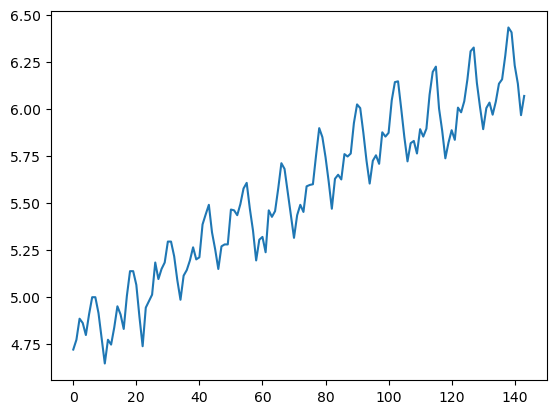

In [31]:
# 분산이 일정
plt.figure()
plt.plot(log_transformed)
plt.show()

### 차분 -> 추세 제거

❗추세 제거 이유  
- 시계열 데이터는 시간이 지날수록 계속 증가하거나 감소하는 trend가 있음.  
- 이 trend 때문에 예측 모델이 시간 흐름에만 끌려다님.  
- 차분(현재 값 - 이전 값)을 통해서 변화량만 남고 추세를 제거

🎯목적 
- 추세를 제거해서 평균이 일정한, 즉 정상성 있는 시계열로 만듦

In [32]:
# 차분
diffed = log_transformed.diff()

In [33]:
diffed

,Passengers
0,NaN
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


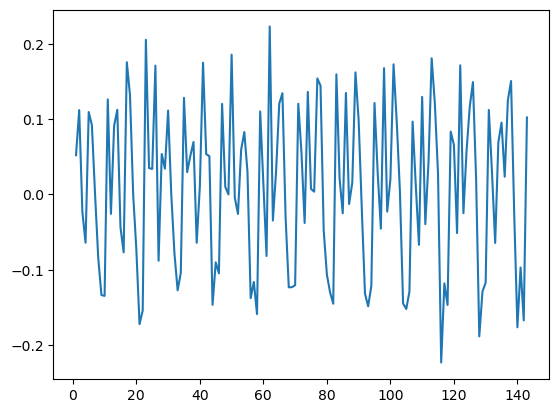

In [34]:
# 커지는 분산과 증가하는 추세를 제거한 air passengers 데이터를 얻을 수 있다.
plt.figure()
plt.plot(diffed)
plt.show()

### 계절 차분

In [35]:
# diff에 12라는 값을 넣어주면 주기를 12로 하는 계절 차분을 수행
seasonally_diffed = diffed.diff(12)
# 차분으로 생긴 결측치 제거
seasonally_diffed.dropna(inplace = True)

바로 이전 값을 빼는 것이므로 맨 첫 번째 값은 차분할 수 있는 이전 값이 없어서 Nan값이 생김.  
이를 제거해 주어야 함.

In [36]:
seasonally_diffed

,Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


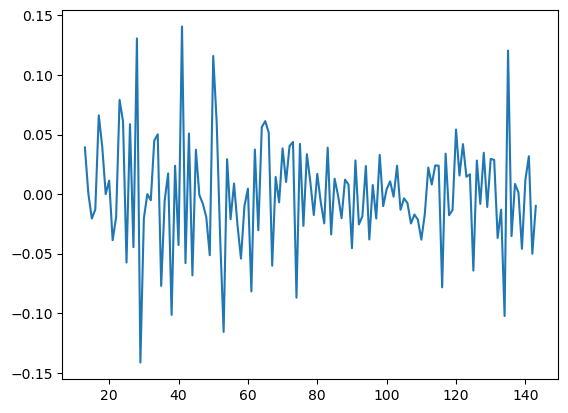

In [37]:
# 로그 변환과 차분한 데이터 시각화
plt.figure()
plt.plot(seasonally_diffed)
plt.show()

## 검정

In [38]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x): # adf검정을 위한 함수 정의
    stat, p_value, lags, nobs, crit, icb = adfuller(x) # adfuller 함수를 이용하면 6가지 output
    print('ADF statistics')
    print(stat) # ADF 검정 통계량
    print('-'*15)
    print('P-value')
    print(p_value) # P-value

In [39]:
# 로그 변환 + 차분 + 계절 차분 수행한 데이터로 adf 테스트
adf_test(seasonally_diffed)

ADF statistics
-4.443324941831145
---------------
P-value
0.00024859123113838257


- p-value < 유의수준 : 대립가설 채택, 귀무가설 기각

유의수준 0.01에서 시계열에 단위근이 존재한다라는 귀무가설을 기각하고,  
시계열은 정상적이다라는 대립가설을 채택

## 데이터 불러오기

In [40]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

# robot exection failures 데이터
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [41]:
# 데이터셋 확인(timeseries와 y 확인)
timeseries # id, time을 제외하고 6개 column의 X변수

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [42]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

In [43]:
# 데이터셋 가공
def custom_classification_split(x,y,test_size=0.3):

    num_true = int(y.sum()*test_size)
    num_false = int((len(y)-y.sum())*test_size)

    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    print(id_list)
    y_train = y.drop(id_list)                            
    y_test = y.iloc[id_list].sort_index()                
    X_train = x[~x['id'].isin(id_list)]
    X_test = x[x['id'].isin(id_list)]

    return X_train, y_train, X_test, y_test

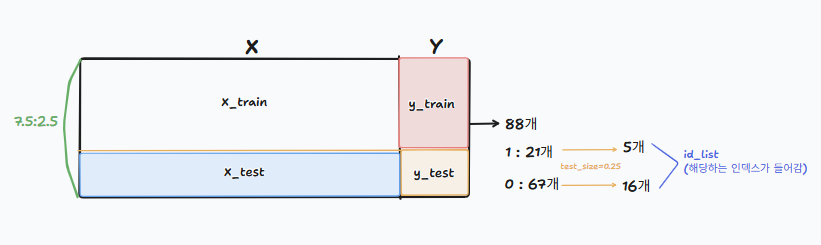

In [44]:
# 데이터셋 나누기
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y, test_size=0.25)

[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 1, 2, 3, 4, 5]


In [45]:
# [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 1, 2, 3, 4, 5]
# [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 1, 2, 3, 4, 5, 6]

In [46]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = EfficientFCParameters()

EfficientParameters는 큰 계산비용이 필요한 calculator를 제외하고 가능한 모든 피처 생성

In [47]:
# Feature extraction
comprehensive_features_train = extract_features(
                                    X_train,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:33<00:00,  1.68s/it]


In [48]:
comprehensive_features_test = extract_features(
                                    X_test,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 18/18 [00:12<00:00,  1.49it/s]


In [49]:
# impute 전처리 함수
impute(comprehensive_features_train)

C:\Users\juwonhee\Anaconda3\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,2.253858,2.397895,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.589027,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [50]:
impute(comprehensive_features_test)

C:\Users\juwonhee\Anaconda3\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['F_z__partial_autocorrelation__lag_7'
 'F_z__partial_autocorrelation__lag_8'
 'F_z__partial_autocorrelation__lag_9' ...
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'F_y__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_z__variance_larger_than_standard_deviation,F_z__has_duplicate_max,F_z__has_duplicate_min,F_z__has_duplicate,F_z__sum_values,F_z__abs_energy,F_z__mean_abs_change,F_z__mean_change,F_z__mean_second_derivative_central,F_z__median,...,F_y__fourier_entropy__bins_5,F_y__fourier_entropy__bins_10,F_y__fourier_entropy__bins_100,F_y__permutation_entropy__dimension_3__tau_1,F_y__permutation_entropy__dimension_4__tau_1,F_y__permutation_entropy__dimension_5__tau_1,F_y__permutation_entropy__dimension_6__tau_1,F_y__permutation_entropy__dimension_7__tau_1,F_y__query_similarity_count__query_None__threshold_0.0,F_y__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,0.0,1.0,938.0,58678.0,1.214286,0.071429,0.192308,63.0,...,0.562335,0.735622,1.213008,0.535961,0.566086,0.600166,0.639032,0.683739,0.0,1.000000
2,1.0,0.0,0.0,1.0,932.0,58190.0,5.571429,-0.285714,-0.269231,63.0,...,1.255482,1.494175,1.906155,1.697734,2.253858,2.397895,2.302585,2.197225,0.0,3.000000
3,1.0,0.0,0.0,1.0,917.0,56379.0,5.500000,-0.214286,-0.653846,61.0,...,1.320888,1.906155,2.079442,1.697734,2.369382,2.397895,2.302585,2.197225,0.0,2.142857
4,1.0,0.0,1.0,1.0,933.0,58253.0,4.714286,0.285714,-0.076923,63.0,...,1.494175,1.667462,1.906155,1.479133,2.253858,2.271869,2.302585,2.197225,0.0,2.428571
5,1.0,0.0,1.0,1.0,909.0,55437.0,5.857143,-0.571429,0.269231,59.0,...,1.320888,1.494175,1.906155,1.479133,2.369382,2.397895,2.302585,2.197225,0.0,2.285714
19,1.0,0.0,0.0,1.0,930.0,58452.0,8.071429,-1.071429,1.307692,62.0,...,1.073543,1.494175,1.906155,1.412745,1.979205,2.145842,2.302585,2.197225,0.0,17.142857
20,1.0,0.0,0.0,1.0,975.0,67045.0,10.071429,-3.785714,1.961538,61.0,...,0.735622,0.735622,1.255482,1.585771,2.138333,2.397895,2.302585,2.197225,0.0,18.142857
21,1.0,0.0,0.0,1.0,988.0,72912.0,22.571429,1.285714,-3.884615,64.0,...,1.494175,1.494175,1.906155,1.626021,2.253858,2.397895,2.302585,2.197225,0.0,12.857143
22,1.0,0.0,0.0,1.0,936.0,59376.0,9.571429,-1.857143,0.961538,60.0,...,0.735622,1.073543,1.386294,1.438883,1.820076,2.019815,2.163956,2.197225,0.0,20.285714
23,1.0,0.0,0.0,1.0,910.0,56466.0,6.571429,1.857143,-0.307692,61.0,...,1.073543,1.386294,2.079442,1.671595,2.369382,2.397895,2.302585,2.197225,0.0,7.571429


### RandomForest

In [79]:
# RandomForest 사용 및 score 확인
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3, random_state=0)

rf_clf.fit(comprehensive_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

In [80]:
comprehensive_features_test

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.025326,2.043192,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


In [81]:
y_test

2      True
3      True
4      True
5      True
6      True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
dtype: bool

In [82]:
# print((comprehensive_features_train.columns == comprehensive_features_test.columns).all())

In [83]:
# comprehensive_features_test = comprehensive_features_test[comprehensive_features_train.columns]

In [84]:
rf_clf.score(comprehensive_features_test, y_test)

1.0

test_size: 0.3  -> 약 0.666  
test셋에 적합해본 결과 약 0.66의 정확도를 보이며 불만족스러운 결과를 확인  
  
test_size: 0.25 -> 1.0

### XGBoost

In [136]:
# XGBoost 사용 및 score 확인
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)

# XGBoost 모델을 학습
xgb_clf.fit(comprehensive_features_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [137]:
pred = xgb_clf.predict(comprehensive_features_test)

In [138]:
# XGBoost 모델의 score를 확인
xgb_clf.score(comprehensive_features_test, y_test)

1.0

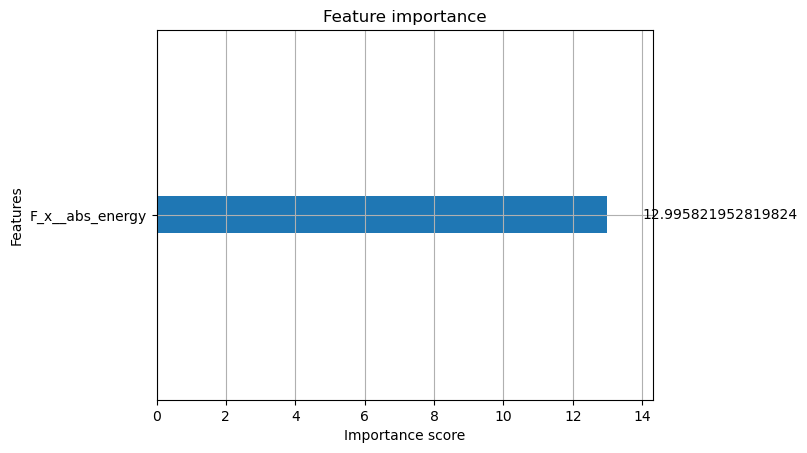

In [139]:
# XGBoost plot_importance 확인 및 시각화
# plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인
xgb.plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

In [140]:
sum(xgb_clf.feature_importances_ != 0) # Fx 값의 abs_energy 특징만의 유의미함

1

In [142]:
feature_values = comprehensive_features_test['F_x__abs_energy']
y_pred = xgb_clf.predict(comprehensive_features_test)

# 데이터프레임으로 합치기
import pandas as pd

xgb_result = pd.DataFrame({
    'F_x__abs_energy': feature_values,
    'y_pred': y_pred,
    'Actual': y_test.values
})

xgb_result

,F_x__abs_energy,y_pred,Actual
1,14.0,1,True
2,25.0,1,True
3,12.0,1,True
4,16.0,1,True
5,17.0,1,True
19,6109.0,0,False
20,34455.0,0,False
21,16495.0,0,False
22,12700.0,0,False
23,10593.0,0,False


In [144]:
summary = xgb_result.groupby('F_x__abs_energy')['y_pred'].mean()

print(summary)

F_x__abs_energy
12.0       1.0
14.0       1.0
16.0       1.0
17.0       1.0
25.0       1.0
199.0      0.0
250.0      0.0
451.0      0.0
809.0      0.0
1002.0     0.0
1100.0     0.0
1366.0     0.0
6109.0     0.0
6853.0     0.0
9807.0     0.0
10593.0    0.0
12700.0    0.0
16495.0    0.0
18717.0    0.0
34455.0    0.0
37100.0    0.0
Name: y_pred, dtype: float64


시계열 데이터에서 활동량이 적거나 에너지가 적은 상태가 고장 또는 이상 상태와 관련이 있다고 모델이 판단했다고 볼 수 있다.

In [89]:
# Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16.0},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21.0}}

## DecisionTreeClassifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=0) # 모델 선택

dt_clf.fit(comprehensive_features_train, y_train) # 모델 학습
dt_clf.score(comprehensive_features_test, y_test)

0.8095238095238095

In [95]:
# Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, dt_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0,
  'recall': 0.75,
  'f1-score': 0.8571428571428571,
  'support': 16.0},
 'false': {'precision': 0.5555555555555556,
  'recall': 1.0,
  'f1-score': 0.7142857142857143,
  'support': 5.0},
 'accuracy': 0.8095238095238095,
 'macro avg': {'precision': 0.7777777777777778,
  'recall': 0.875,
  'f1-score': 0.7857142857142857,
  'support': 21.0},
 'weighted avg': {'precision': 0.8941798941798942,
  'recall': 0.8095238095238095,
  'f1-score': 0.8231292517006802,
  'support': 21.0}}

## LightGBM

In [96]:
# 특수문자 제거
comprehensive_features_train.columns = comprehensive_features_train.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
comprehensive_features_test.columns = comprehensive_features_test.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)

In [100]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()

lgbm_clf.fit(comprehensive_features_train, y_train)

[LightGBM] [Info] Number of positive: 16, number of negative: 51
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35670
[LightGBM] [Info] Number of data points in the train set: 67, number of used features: 1841
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238806 -> initscore=-1.159237
[LightGBM] [Info] Start training from score -1.159237
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier()

In [101]:
lgbm_clf.score(comprehensive_features_test, y_test)

1.0

In [102]:
# Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, lgbm_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16.0},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21.0}}

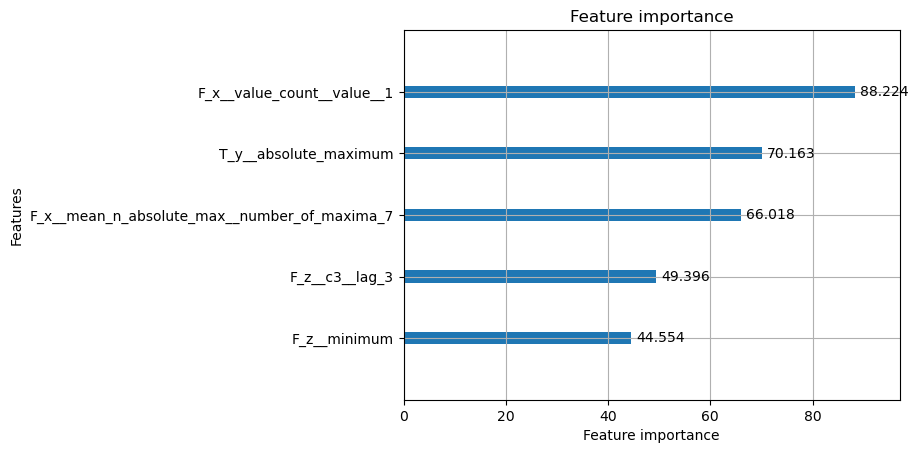

In [108]:
import lightgbm as lgb
import matplotlib.pyplot as plt

lgb.plot_importance(lgbm_clf, importance_type = 'gain', max_num_features=5)
plt.show()

시계열 내에서 값이 1인 데이터의 개수를 세는 피처 = F_x__value_count__value_1  
로봇의 고장 유무는 F_x 데이터에서 1에 해당하는 데이터 포인트가 몇 개 나왔는 지에 영향을 많이 받는다고 볼 수 있다.

In [126]:
# [col for col in comprehensive_features_train.columns if 'value_count__value' in col]

In [127]:
# comprehensive_features_train['F_x__value_count__value_1']

In [128]:
# comprehensive_features_test['F_x__value_count__value_1']

In [129]:
feature_values = comprehensive_features_test['F_x__value_count__value_1']
y_pred = lgbm_clf.predict(comprehensive_features_test)

# 데이터프레임으로 합치기
import pandas as pd

df_result = pd.DataFrame({
    'F_x_value_count_1': feature_values,
    'Prediction': y_pred,
    'Actual': y_test.values
})

df_result

,F_x_value_count_1,Prediction,Actual
1,0.0,True,True
2,0.0,True,True
3,1.0,True,True
4,3.0,True,True
5,0.0,True,True
19,2.0,False,False
20,1.0,False,False
21,0.0,False,False
22,2.0,False,False
23,0.0,False,False


In [125]:
summary = df_result.groupby('F_x_value_count_1')['Prediction'].mean()

print(summary)

F_x_value_count_1
0.0    0.60
1.0    0.25
2.0    0.00
3.0    0.25
Name: Prediction, dtype: float64


In [130]:
feature_values = comprehensive_features_test['T_y__absolute_maximum']
y_pred = lgbm_clf.predict(comprehensive_features_test)

# 데이터프레임으로 합치기
import pandas as pd

df_result = pd.DataFrame({
    'T_y__absolute_maximum': feature_values,
    'Prediction': y_pred,
    'Actual': y_test.values
})

df_result

,T_y__absolute_maximum,Prediction,Actual
1,1.0,True,True
2,5.0,True,True
3,5.0,True,True
4,6.0,True,True
5,5.0,True,True
19,109.0,False,False
20,374.0,False,False
21,266.0,False,False
22,284.0,False,False
23,111.0,False,False


In [131]:
summary = df_result.groupby('T_y__absolute_maximum')['Prediction'].mean()

print(summary)

T_y__absolute_maximum
1.0      1.0
5.0      1.0
6.0      1.0
9.0      0.0
11.0     0.0
28.0     0.0
41.0     0.0
77.0     0.0
85.0     0.0
109.0    0.0
111.0    0.0
131.0    0.0
173.0    0.0
179.0    0.0
196.0    0.0
266.0    0.0
284.0    0.0
374.0    0.0
494.0    0.0
Name: Prediction, dtype: float64


T_y__absolute_maximum은 시계열 y값에서 절대값이 가장 큰 최대치가 작을수록 모델이 고장(=1)으로 예측할 가능성이 높다.

정상 상태일 땐 로봇이나 기계에서 나오는 신호가 힘차고 뚜렷한 변동(큰 진폭 등)이 있는데,  
고장이 나면 신호가 약해지고, 크게 움직이지 않거나 에너지가 떨어지는 상태가 된다.  
그래서 신호의 절대 최대치가 작고 에너지도 낮아지는 경향이 있다는 뜻이다.  
  
즉, "기계가 정상 작동할 때보다 움직임이나 신호가 약해지고 작아지는 게 고장의 징후" 라고 모델이 학습해서 그런 특징을 중요하게 판단하게 된다.